In [2]:
%pylab inline
import requests, zipfile
import StringIO
import datetime
import pandas as pd
import numpy as np
from workflow.data import *
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [7]:
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

In [3]:
username = 'psam071'
host = 'localhost'
dbname = 'citibike'

db = create_engine('postgres://%s@%s/%s' % (username,host,dbname))
con = None

con = psycopg2.connect(database = dbname, user = username, host = host)

In [1]:
query = """
        SELECT * FROM stations
        WHERE long > -74.025;
"""

df = pd.read_sql_query(query, con)
df.head()

NameError: name 'pd' is not defined

In [5]:
neighborhoods = pd.read_csv('nyc_neighborhoods.csv')

hoods = neighborhoods

# find the centroids in hoods that are closest to the station points in df
X = df[['long', 'lat']]

def closest_node(node, nodes):
    nodes = np.asarray(nodes)
    deltas = nodes - node
    dist_2 = np.einsum('ij,ij->i', deltas, deltas)
    return np.argmin(dist_2)

a = hoods[['longitude', 'latitude']]
node_labels = []
# return a list of indices of hoods to pass on hoods
for i in xrange(X.shape[0]):
    node_labels.append(closest_node([X.iloc[i,:]], a))
    
n_hoods = df[['id', 'neighborhood', 'borough']]
n_hoods = n_hoods.set_index('id')
n_hoods.head()

n_hoods.to_sql('neighborhoods', db)

,Borough,neighborhood,longitude,latitude
0,Bronx,Wakefield,-73.847201,40.894705
1,Bronx,Co-op City,-73.829939,40.874294
2,Bronx,Eastchester,-73.827806,40.887556
3,Bronx,Fieldston,-73.905643,40.895437
4,Bronx,Riverdale,-73.912585,40.890834


In [10]:
df['neighborhood'] = hoods.iloc[node_labels].reset_index().neighborhood
df['borough'] = hoods.iloc[node_labels].reset_index().Borough

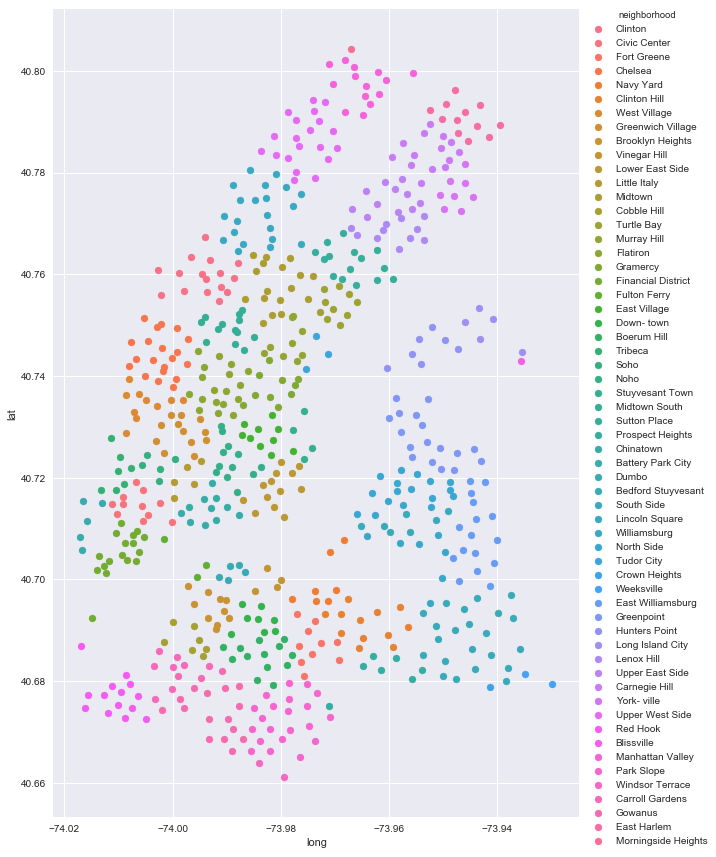

In [18]:
fg = sns.FacetGrid(data = df, hue = 'neighborhood', aspect = 0.7, size = 12)
fg.map(scatter, 'long', 'lat').add_legend()

In [ ]:
n_hoods = df[['id', 'neighborhood', 'borough']]
n_hoods = n_hoods.set_index('id')
n_hoods.head()

n_hoods.to_sql('neighborhoods', db)

In [20]:
# trips_size = 0
# for year in xrange(2015,2018):
#     for month in xrange(1,13):
#         print year, month
#         try:
#             size = pd.read_csv('tripdata/{}{:02}-citibike-tripdata.csv'.format(year,month)).shape[0]
#             trips_size += size
#         except IOError:
#             print '\t{}:{:02} does not exist'.format(year,month)
            
def calc_rows(path, year_range, delim):
# find the number of total rows of a dataset divided into csv files in a single folder
# the path name should have formatting for year/month
    num_rows = 0
    for year in xrange(year_range[0],year_range[1]+1):
        for month in xrange(1,13):
            print year, month
            try:
                size = pd.read_csv(path.format(year,month), 
                                   delimiter = delim,
                                   error_bad_lines = False).shape[0]
                num_rows += size
            except IOError:
                print '\t{}:{:02} does not exist'.format(year,month)
    return num_rows
    
stations_path = 'stationdata/{}{:02}-bikeshare_nyc_raw.csv'
rowsize = calc_rows(stations_path, [2015,2017], '\t')

2015 1
	2015:01 does not exist
2015 2
	2015:02 does not exist
2015 3
2015 4
2015 5
2015 6
2015 7
2015 8


Skipping line 890470: expected 14 fields, saw 26090



2015 9


Skipping line 919921: expected 14 fields, saw 27122

Skipping line 1130607: expected 14 fields, saw 494
Skipping line 1130611: expected 14 fields, saw 11990



2015 10


Skipping line 1121989: expected 15 fields, saw 33231



2015 11


Skipping line 1198732: expected 16 fields, saw 35524



2015 12
2016 1


Skipping line 596959: expected 14 fields, saw 26



2016 2
2016 3


Skipping line 1529828: expected 14 fields, saw 26



2016 4
2016 5
2016 6
2016 7


Skipping line 646269: expected 14 fields, saw 12914



2016 8


Skipping line 586070: expected 32 fields, saw 34772



2016 9


Skipping line 551468: expected 50 fields, saw 22370
Skipping line 551473: expected 50 fields, saw 98



2016 10
2016 11
2016 12
2017 1
2017 2
2017 3
	2017:03 does not exist
2017 4
	2017:04 does not exist
2017 5
	2017:05 does not exist
2017 6
	2017:06 does not exist
2017 7
	2017:07 does not exist
2017 8
	2017:08 does not exist
2017 9
	2017:09 does not exist
2017 10
	2017:10 does not exist
2017 11
	2017:11 does not exist
2017 12
	2017:12 does not exist


In [10]:
trips_size

25547130

In [21]:
rowsize

24085470